<a href="https://colab.research.google.com/github/Elie87/PythonPojects/blob/main/Practice_6_ComputerVison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   781k      0 --:--:-- --:--:-- --:--:--  781k


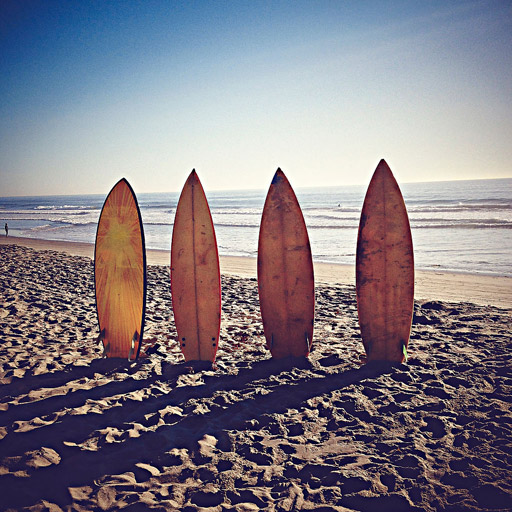

In [ ]:
!curl -o img.jpg https://files.readme.io/069a96b-4d870d7-546212389.jpg

import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread("img.jpg",cv2.IMREAD_COLOR)
cv2_imshow(img)

# Changing Color-space

For color conversion, we use the function `cv2.cvtColor(input_image, flag)` where flag determines the type of conversion.

### Convert to greyscale

To convert img to gray scale the 3-d shape image will be converted to a 1d image.]
for colored img each pixel have 3 VALUES( blue, green , red) to make it in gray scale we compute the mean of the (B+G+R)/3

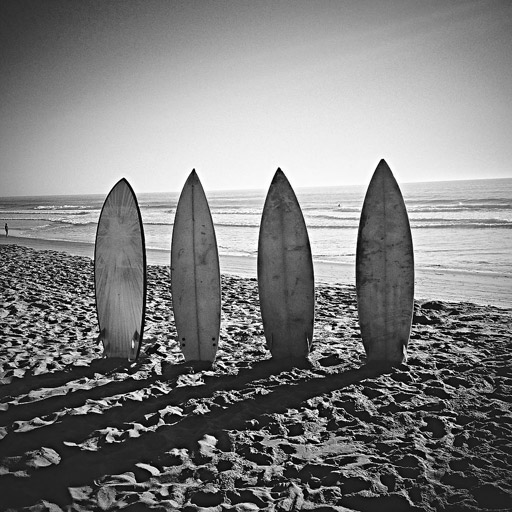

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Image Thresholding

If pixel value is greater than a threshold value, it is assigned one value (white), else it is assigned another value (black). The function used is `cv2.threshold`

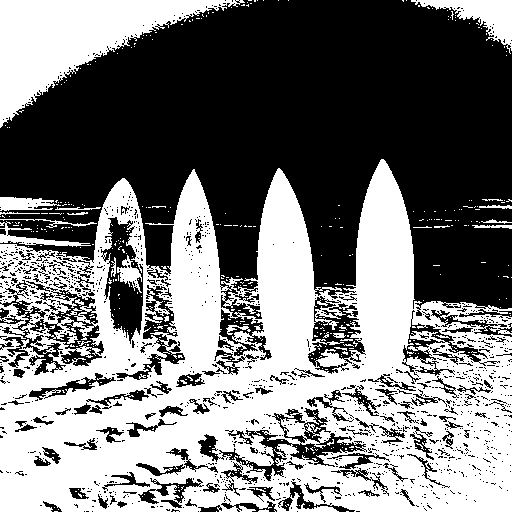

In [ ]:
#input image should be gray scale
retval, threshold =cv2.threshold(gray,120,255,cv2.cv2.THRESH_BINARY_INV)

cv2_imshow(threshold)

## Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

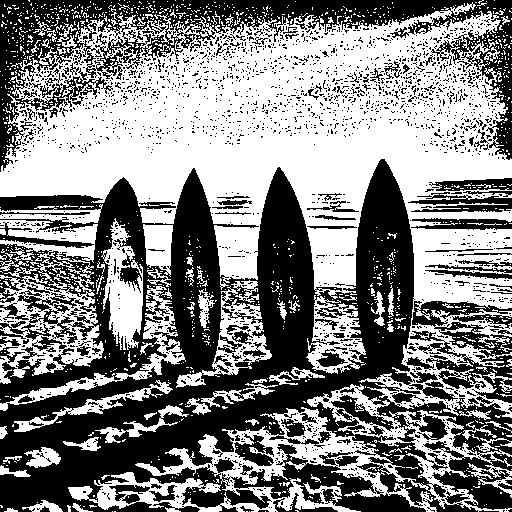

In [ ]:
adaptive_threshold=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
cv2_imshow(adaptive_threshold)

# Find contours

In [ ]:
dst=cv2.GaussianBlur(gray,(3,3),cv2.BORDER_DEFAULT)
ret,thresh=cv2.threshold(dst,200,255,0)

im2, contours, hirerachy=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ValueError: ignored

In [ ]:
import copy

c_img = cv2.drawContours(copy.copy(img), contours, -1, (0,255,0), 3)

cv2_imshow(c_img)

NameError: ignored

# 3-Image Data Preparation

https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/


# How to Load an Image with Kera

In [ ]:
!git clone https://github.com/zaka-ai/computer-vision-course.git

Cloning into 'computer-vision-course'...
remote: Enumerating objects: 2115, done.
remote: Total 2115 (delta 0), reused 0 (delta 0), pack-reused 2115
Receiving objects: 100% (2115/2115), 51.06 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!ls
!pwd
!ls computer-vision-course/deep_learning/data

computer-vision-course	sample_data
/content
baboon.jpg  image1.jpg	image2.jpg


In [ ]:
!pwd
!whoami

/content
root


In [ ]:
# exapmle of loadig imape with Keras API
from keras.preprocessing.image import load_img

img_path="computer-vision-course/deep_learning/data/image1.jpg"
img=load_img(img_path)

print(img.format)
print(img.mode)
print(img.size)



JPEG
RGB
(640, 360)


#Convert image to array to work with it

In [ ]:
from keras.preprocessing.image import img_to_array,array_to_img

#covert to numpy array
img_array=img_to_array(img)
print(img_array.dtype)
print(img_array.shape)

#convert back to img
img_pil=array_to_img(img_array)

float32
(360, 640, 3)


# ImageDataGenerator class
## MNIST Handwritten Image Classification Dataset
## How to Normalize Images With ImageDataGenerator

the mnist data set are english hand written numbers
0 1 2 3 4 5 6 7  8 9

In [ ]:
#import the MNiST Data set

from keras.datasets import mnist
(trainX,trainY),(testX,testY)=mnist.load_data()
# trainX=training Images
#trainY=tain iamges labels

print("train", trainX.shape,trainY.shape)
print(trainY[0:20])
#print(trainX[1])

#summarize pixel values
print("Train", trainX.min(), trainX.max(), trainX.mean(),trainX.std())
print("Test",testX.min(),testX.max(),testX.mean(),testX.std())



#example of normalzie a image dataset
from keras.preprocessing.image import ImageDataGenerator

#reshape dataset to have a single channel
# for example RGB will have 3 channels
width,height,channels=trainX.shape[1],trainX.shape[2],1

#trainX=trainX.reshape((trainX.shape[0],width,height,channels))

trainX=trainX.reshape(trainX.shape+(1,))
testX=testX.reshape((testX.shape[0],width,height,channels))

print(trainX.shape)

#check the scale of pixels
print("train min=%.3f, max=%.3f" %(trainX.min(),trainX.max()))
print("test min=%.3f,  max=%.3f"%(testX.min(),testX.max()))

#create generator(1/max = 1/255)
datagen=ImageDataGenerator(rescale=1.0/255.0)  #we dont need to fit the generator cz this line did the job

#use iteration to scale images
train_iterator=datagen.flow(trainX,trainY,batch_size=64) # batch size determine the number of image in each batch for the training
test_iterator=datagen.flow(testX,testY,batch_size=64)

print('Batches train=%d, test=%d ' %(len(train_iterator),len(test_iterator)))

#confirm if scaling works
batchX,bacthY=train_iterator.next()
print('Batch shape=%s, min=%.2f, max=%.2f'%(batchX.shape, batchX.min(),batchX.max()))
# each batch contain 64 images and each image has the following dimentions (28,28,1)

train (60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644
(60000, 28, 28, 1)
train min=0.000, max=255.000
test min=0.000,  max=255.000
Batches train=938, test=157 
Batch shape=(64, 28, 28, 1), min=0.00, max=1.00


# we can use Image Centring with ImageDataGenerator

in this case the mean pixel will be equal to zero

#Progressively Load Iamges from exisitng deirectories

In [ ]:
!ls computer-vision-course/deep_learning/dataset/
!ls computer-vision-course/deep_learning/dataset/train/
!ls computer-vision-course/deep_learning/dataset/train/blue

test  train  validation
blue  red
blue_car_01.jpg  blue_car_04.jpg  blue_car_07.jpg  blue_car_10.jpg
blue_car_02.jpg  blue_car_05.jpg  blue_car_08.jpg
blue_car_03.jpg  blue_car_06.jpg  blue_car_09.jpg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# imust ger the min adn max before rescale,
datagen=ImageDataGenerator(rescale=1.0/255.0)

#prepare an iteraror for each dataset(train,test,validation)
#using: the flow_from_directory() function
train_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train',batch_size=1,class_mode='binary')
test_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test',batch_size=1,class_mode='binary')

#confrim the iterator work
batchX, batchY=train_it.next()
print("batch shape=%s, min=%.3f, max=%.3f" %(batchX.shape, batchX.min(), batchX.max()))
print(batchY.shape)

batch_testX,batch_testY=test_it.next()
print("Test Batch shape=%s, min=%.3f, max=%.3f "%(batch_testX.shape,batch_testX.min(),batch_testX.max()))

Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
batch shape=(1, 256, 256, 3), min=0.000, max=1.000
(1,)
Test Batch shape=(1, 256, 256, 3), min=0.000, max=1.000 


# Data augmentation

## Horizontal shift, Vertical shift,flip, rotation, Zoom and brightness Augmentation

In [ ]:
!git clone https://github.com/zaka-ai/computer-vision-course.git

Cloning into 'computer-vision-course'...
remote: Enumerating objects: 2115, done.
remote: Total 2115 (delta 0), reused 0 (delta 0), pack-reused 2115
Receiving objects: 100% (2115/2115), 51.06 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (34/34), done.


(512, 512, 3)
(1, 512, 512, 3)


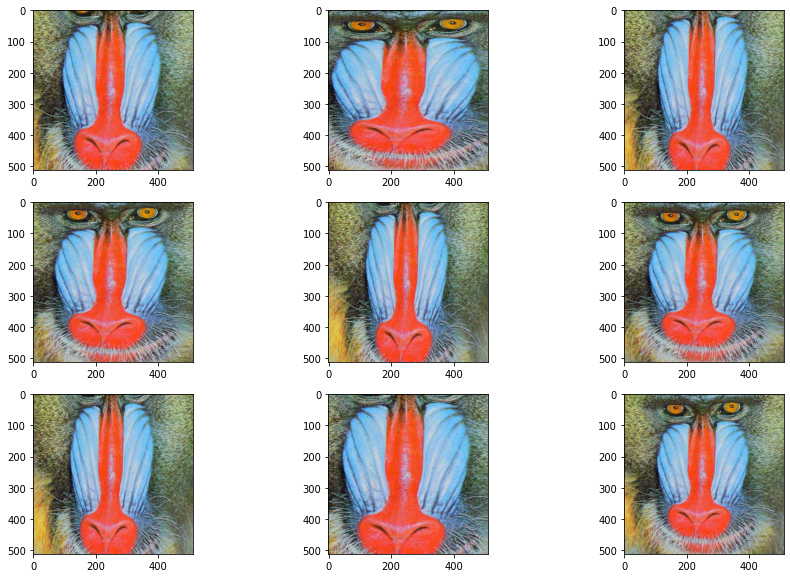

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
import matplotlib.pyplot as plt 


#load image
path="computer-vision-course/deep_learning/data/baboon.jpg"
img=load_img(path)

#convert to numpy array
data=img_to_array(img)

print(data.shape)

#expand dimension to one sample
samples=expand_dims(data,0) # to make it similar to a data set of one image only
print(samples.shape)

#create image data augmentation generator(for horizontal shifting)
#datagen=ImageDataGenerator(width_shift_range=[-200,200]) #width_shift_range: It actually shift the image to the left or right(horizontal shifts)
                                                         #integer value>=1 count pixel as range
                                                         #shit imge randomly 200 pixel left and right
                                                         #if the values used are doubles means %
                                                         # ex: 0.5=50% and 1.0=100%

#create image data augmentation generator(for Vertical shifting)
#datagen=ImageDataGenerator(height_shift_range=0.5)   #0.5 means 50% of the image up and down


#create image data augmentation generator(for vertical flipping)
#datagen=ImageDataGenerator(vertical_flip=True)

#create image data augmentation generator(for horizontal roation and flipping, and brightness change)
#datagen=ImageDataGenerator(rotation_range=90,vertical_flip=True,brightness_range=[0.2,1.0])

#create image data augmentation generator(for zoom augmentation)
datagen=ImageDataGenerator(zoom_range=[0.5,1.0]) #the values doubles mean %

#prepare data iterator
it=datagen.flow(samples, batch_size=1)

plt.figure(figsize=(15,10))

#generator samples and plot
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)
 # 330 means : 3 rows and 3 columns and 0 is the index 
 #wedd +1 to start from index 1 and then "i" will increment as [0,1,2,3,5,6,7,8]
 # or we can use
 #plt.subplot(331+i)


  #generate batch of images
  batch=it.next()

  #convert to unsigned integers for viewing
  image=batch[0].astype('uint32')

  #plot raw pixel data
  plt.imshow(image)

#show the figure
plt.show()


### Example progressivly loading images and using all augmentations

Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Batch shape=(12, 256, 256, 3), min=0.000, max=247.000
0
1
2
3
4
5
6
7


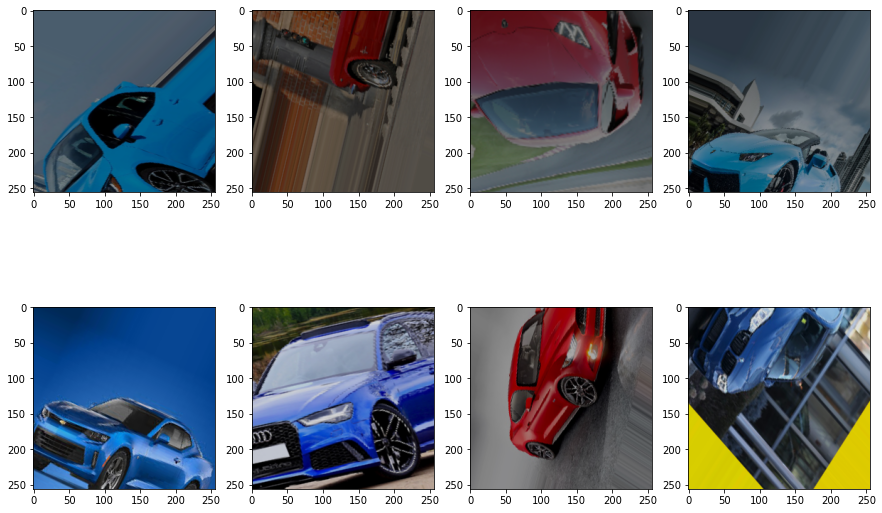

0
1
2
3
4
5


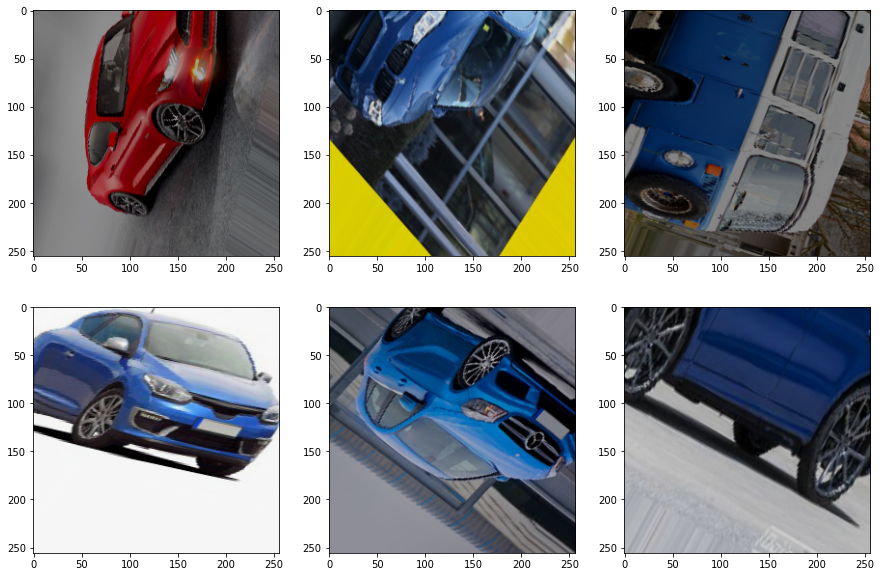

"# example of progressively loading images from file\nfrom keras.preprocessing.image import ImageDataGenerator\n\n# create generator\ndatagen = ImageDataGenerator(vertical_flip=True, rotation_range=90, brightness_range=[0.4, 1.0])\n\n# prepare an iterators for each dataset (train, test, validation)\n# HINT: use flow_from_directory() function\ntrain_it = datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train', batch_size=1, class_mode='binary')\ntest_it = datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test', batch_size=1, class_mode='binary')\n\n# confirm the iterator works\nbatchX, batchy = train_it.next()\nprint('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))\n\npyplot.figure(figsize=(15,10))\n# generate samples and plot\nfor i in range(9):\n\t# define subplot\n\tpyplot.subplot(330 + 1 + i)\n\t\n  # generate batch of images\n\tbatchX, batchY = train_it.next()\n\t\n  # convert to unsigned integers fo

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#create generator
datagen=ImageDataGenerator(vertical_flip=True,rotation_range=90,width_shift_range=[-0.2,1.2],
                           height_shift_range=0.5,zoom_range=[0.5,1.2],brightness_range=[0.4,1.0])

#prepare iterator for each dataset (train,test,validation)
train_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train',batch_size=12,class_mode='binary') # we take in the training batch 12 images for testing purposes
test_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test',batch_size=1,class_mode='binary')

#confirm the iterator work
batchX,batchy=train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f'%(batchX.shape,batchX.min(),batchX.max()))

batch_testX,batch_testy=test_it.next()

#generate samples to see if works
plt.figure(figsize=(15,10))
# the batch in this example have 12 images
#showing the first 8 image sin the batch
#N.B: the max that we can show is 9 images
for i in range(8):
  plt.subplot(241+i)
  print(i)

  #convert for unsigned integeres for viewing
  image=batchX[i].astype('uint32') #batchX[0]= take all the matrix of the image

  #plot raw pixels
  plt.imshow(image)

#show the image
plt.show()

#showing the second hafl of the batch
plt.figure(figsize=(15,10))
for i in range(6):
  plt.subplot(231+i)
  print(i)

  #convert for unsigned integeres for viewing
  image=batchX[6+i].astype('uint32') #srtart from image 6, the middel of the batch that have 12 images

  #plot raw pixels
  plt.imshow(image)

plt.show()


'''# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator

# create generator
datagen = ImageDataGenerator(vertical_flip=True, rotation_range=90, brightness_range=[0.4, 1.0])

# prepare an iterators for each dataset (train, test, validation)
# HINT: use flow_from_directory() function
train_it = datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train', batch_size=1, class_mode='binary')
test_it = datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test', batch_size=1, class_mode='binary')

# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

pyplot.figure(figsize=(15,10))
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	
  # generate batch of images
	batchX, batchY = train_it.next()
	
  # convert to unsigned integers for viewing
	image = batchX[0].astype('uint32')
	
  # plot raw pixel data
	pyplot.imshow(image)

# show the figure
'''


In [ ]:
!ls computer-vision-course/deep_learning/dataset/train/red

ls: cannot access 'computer-vision-course/deep_learning/dataset/train/red': No such file or directory


# 5_Convoltuions adn Pooling

## How convolutoion work

### Example of 2D Convolutional layer

In [ ]:
# example of calculation 2d convolutions

import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D

#input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

print(type(data))
data=np.asarray(data)
print(type(data))

#reshape input
data=data.reshape(1,8,8,1)

#create model
model=Sequential()
model.add(Conv2D(filters=1,kernel_size=(3,3), input_shape=(8,8,1)))

#define vertical line detector
detector=[[[[0]],[[1]],[[0]]],
          [[[0]],[[1]],[[0]]],
          [[[0]],[[1]],[[0]]]]
weights=[np.asarray(detector),np.asarray([0.0])]

#store the weights in the model's Kernel
model.set_weights(weights)

#confirm they were stored
print(model.get_weights())
print(model.summary()) # 10 trainable params : 9 form the kernel and 1 for the bias

#apply filter to input data
yhat=model.predict(data)
print(type(yhat))
print(yhat.shape)
print(yhat)

for r in range(yhat.shape[1]):
  print([yhat[0,r,c,0] for c in range(yhat.shape[2])]) # r for rows and c for columsn


<class 'list'>
<class 'numpy.ndarray'>
[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None
<class 'numpy.ndarray'>
(1, 6, 6, 1)
[[[[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [3.]
   [3.]
   [0.]
   [0.]]]]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0

## Stacked CNN with padding with larger stride



In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()
model.add(Conv2D(1,(3,3),padding='same',input_shape=(8,8,1)))
model.add(Conv2D(1,(3,3),padding='same',strides=(2,2)))
model.add(MaxPooling2D())
# or we can use
#model.add(AveragePooling2D())
model.add(Conv2D(1,(3,3),padding='same'))
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 1)           10        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 1)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 1)           10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### full example while loading images

In [ ]:
!git clone https://github.com/zaka-ai/computer-vision-course.git

Cloning into 'computer-vision-course'...
remote: Enumerating objects: 2115, done.
remote: Total 2115 (delta 0), reused 0 (delta 0), pack-reused 2115
Receiving objects: 100% (2115/2115), 51.06 MiB | 21.35 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!ls
!mkdir elie

computer-vision-course	dog.jpg  sample_data


In [ ]:
!ls
!cd elie

computer-vision-course	dog.jpg  elie  sample_data


In [ ]:
!ls computer-vision-course/deep_learning/dataset
!ls computer-vision-course/deep_learning/dataset/train/blue


test  train  validation
blue_car_01.jpg  blue_car_04.jpg  blue_car_07.jpg  blue_car_10.jpg
blue_car_02.jpg  blue_car_05.jpg  blue_car_08.jpg
blue_car_03.jpg  blue_car_06.jpg  blue_car_09.jpg


Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
(1, 256, 256, 3) 0.0 160.0


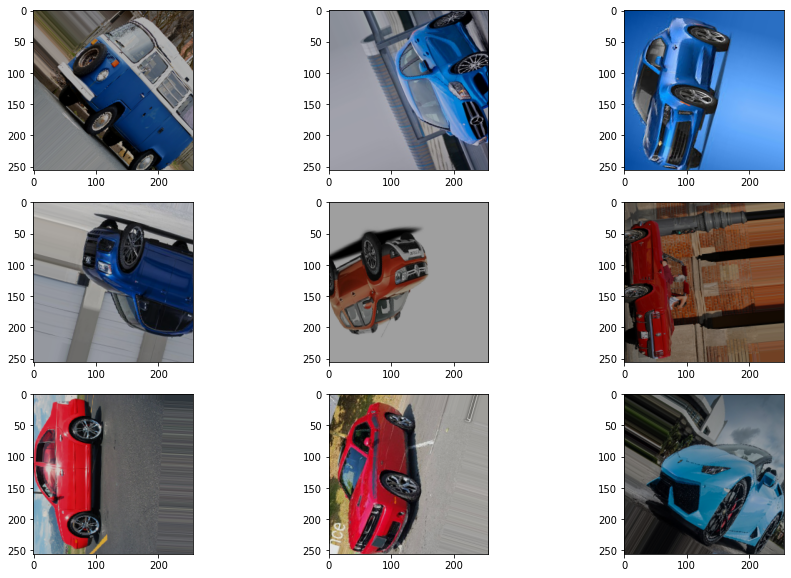

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15376)             0         
_________________________________________________________________
dense (Dense)                (None, 15376)             236436752 
_________________________________________________________________
dense_1 (Dense)              (None, 250)               3

KeyboardInterrupt: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


datagen=ImageDataGenerator(vertical_flip=True, rotation_range=90,
                           brightness_range=[0.4,1.0],width_shift_range=[-0.2,+0.2])
#this Image generator will make the training a lot more difficult but more effeicnt for real world scenarios
                          
                         
'''
#Normalize the image
datagen.rescale=(1.0/255)

'''
train_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train',
                                     batch_size=1,class_mode='binary')
test_it=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test',
                                     batch_size=1,class_mode='binary')

batchX,batchy=train_it.next()
batch_testX,batch_testy=test_it.next()
print(batchX.shape,batchX.min(),batchX.max())
#print images
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(330+1+i)
  batchX,batchy=train_it.next()
  image=batchX[0].astype('uint32')
  plt.imshow(image)

plt.show()


model=Sequential()
model.add(Conv2D(8,(3,3),padding='same',input_shape=(batchX.shape[1],batchX.shape[2],batchX.shape[3])))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3)))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(15376,activation='relu')) # the nummber of neurones first random tehn it is computed by the model then we adjust it.
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])
model.fit_generator(train_it,validation_data=test_it,epochs=10,steps_per_epoch=20,verbose=1) # steps_per_epoch=20, is the nubmer of batches in each epoch
                                                                                              # becasue i have 20 images in the training set.
                                                                                              #usualy this parameter is explicit in noromal data science project,because the training data length is fixed
                                                                                              # but in computer vision, it is better to fixit because of data augmentation


In [ ]:
print(train_it.class_indices.keys())
print(train_it.class_indices)
print("-------")
print(train_it.labels)
print(type(train_it.labels))
print(train_it.labels.shape)
# wcih means we have 20 images for the training in each Data generator
#this is true what ever was the batch size( you can chage it and test these lines)
# For more imfo check "Computer vision.docx " in My PC


dict_keys(['blue', 'red'])
{'blue': 0, 'red': 1}
-------
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>
(20,)


# AlexNet
### 1st method

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

model=Sequential()
model.add(Conv2D(96,11,strides=4,padding='valid',activation='relu',input_shape=(227,227,3)))
model.add(MaxPooling2D(3,2))
model.add(Conv2D(256,5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(3,2))
model.add(Conv2D(384,3,strides=1,padding='same',activation='relu'))
model.add(Conv2D(256,3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(3,2))
model.add(Flatten())
model.add(Dense(4096,activation='relu')) #we could used 9216, to connecto to all neurones
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 256)       884992    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 256)        

# AlexNet
### 2nd method

In [ ]:
from keras import layers
from keras.models import Model

in_layer = layers.Input((227,227,3))
conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
pool1 = layers.MaxPool2D(3, 2)(conv1)
conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
pool2 = layers.MaxPool2D(3, 2)(conv2)
conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
pool3 = layers.MaxPool2D(3, 2)(conv4)
flattened = layers.Flatten()(pool3)
dense1 = layers.Dense(4096, activation='relu')(flattened)
drop1 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(4096, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(dense2)
preds = layers.Dense(1000, activation='softmax')(drop2)

model = Model(in_layer, preds)
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 256)      

# Transfer Learning

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/


In [ ]:
!whoami
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/dog.jpg
! ls


root
--2020-10-13 08:48:48--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/dog.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108800 (106K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 106.25K  --.-KB/s    in 0.04s   

2020-10-13 08:48:49 (2.55 MB/s) - ‘dog.jpg’ saved [108800/108800]

dog.jpg  sample_data


## Example of model loading

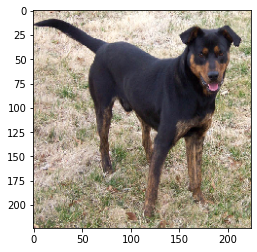

In [ ]:
from keras.applications.vgg16 import VGG16
# 1- load model without output layer
model=VGG16(include_top=False)

# 2- laod model and specify new input shape for images and avg pooling output
from keras.layers import Input
new_input =Input(shape=(640,480,3))
model=VGG16(include_top=False,input_tensor=new_input, pooling='avg')

#3- prepare images as they were prepared for training
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

images=load_img('dog.jpg',target_size=(224,224))
plt.imshow(images)
image_dog=img_to_array(images)
image_dog=image_dog.reshape((1,)+image_dog.shape)
prepared_images_dog=preprocess_input(image_dog)

#4- define the model with random weights  and 10 classes
new_input_2=Input(shape=(640,480,3))
model=VGG16(weights=None,input_tensor=new_input,classes=10)

#5- Load the inception pretrained model
from keras.applications.inception_v3 import InceptionV3
model=InceptionV3()
#model.summary()

# 6- load the ResNet50 pretrained model
from keras.applications.resnet50 import ResNet50
model=ResNet50()
#model.summary()

## Example of Pre trained model as Classifier

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

image=load_img("dog.jpg",target_size=(224,224))
image=img_to_array(image)
image=image.reshape((1,)+image.shape)
image=preprocess_input(image)

model=VGG16()

#predict the probability across all output classes
yhat=model.predict(image)
#convert the probability to class labels
label=decode_predictions(yhat, top=10)   # the default top predecition number is 5, we can change it
                                         # to show them all set top=1000
#retrive the most likely result
label_1=label[0][0]
#print the classification
print('%s (%.2f%%)'%(label_1[1],label_1[2]*100) )

print(label_1)
print(label)
print(len(label[0]))
print(yhat.shape)

Doberman (33.59%)
('n02107142', 'Doberman', 0.3359482)
[[('n02107142', 'Doberman', 0.3359482), ('n02105412', 'kelpie', 0.2161594), ('n02106550', 'Rottweiler', 0.17698686), ('n02089078', 'black-and-tan_coonhound', 0.12776828), ('n02107312', 'miniature_pinscher', 0.03730366), ('n02087046', 'toy_terrier', 0.0131681645), ('n02107908', 'Appenzeller', 0.009702219), ('n02101006', 'Gordon_setter', 0.009040944), ('n02090379', 'redbone', 0.0053323694), ('n02100877', 'Irish_setter', 0.0053001116)]]
10
(1, 1000)


## Pre-Trained Model as Feature Extractor Preprocessor

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from pickle import dump

image=load_img("dog.jpg", target_size=(224,224))
image=img_to_array(image)
image=image.reshape((1,)+image.shape)
print(iamge.shape)
image=preprocess_input(image)

model=VGG16()
# remove the output layer
model=Model(inputs=model.inputs, outputs=model.layers[-2].output)
#get extracted features
features=model.predict(image)
print(features.shape)

#save file
dump(features, open('dog.pkl','wb'))

# i must try to load many inage insted of one dog image, then re-imported it successfully

(1, 224, 224, 3)
(1, 4096)


In [ ]:
import pandas as pd

df=pd.read_pickle("dog.pkl")
print(df)
print(df.shape)
print(df[0])

[[0. 0. 0. ... 0. 0. 0.]]
(1, 4096)
[0. 0. 0. ... 0. 0. 0.]


## Previous example with multiple images.

In [ ]:
!git clone https://github.com/zaka-ai/computer-vision-course.git
!ls

#https://becominghuman.ai/using-keras-imagedatagenerator-with-transfer-learning-c4787d430060

Cloning into 'computer-vision-course'...
remote: Enumerating objects: 2115, done.
remote: Total 2115 (delta 0), reused 0 (delta 0), pack-reused 2115
Receiving objects: 100% (2115/2115), 51.06 MiB | 34.22 MiB/s, done.
Resolving deltas: 100% (34/34), done.
computer-vision-course	sample_data


In [ ]:
!ls computer-vision-course/deep_learning/dataset/train

red_car_01.jpg	red_car_03.jpg	red_car_05.jpg	red_car_07.jpg	red_car_09.jpg
red_car_02.jpg	red_car_04.jpg	red_car_06.jpg	red_car_08.jpg	red_car_10.jpg


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from pickle import dump
from keras.preprocessing.image import ImageDataGenerator 

datagen=ImageDataGenerator()

# i will use the imagedatagenerator to take the image from exisiting directory,
# the image data generator will do all the need work to reshape the images and convert them
#to numpy arrays, in this example we didn't do any data augmentation

train=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train',batch_size=1,target_size=(244,244))


model=VGG16()
# remove the output layer
model=Model(inputs=model.inputs, outputs=model.layers[-2].output)
#get extracted features
features=model.predict(train)
print(features.shape)
print(features[0].shape)
print(features[0])

Found 20 images belonging to 2 classes.
(20, 4096)
(4096,)
[0.45719716 0.         6.2481546  ... 6.350036   0.         1.4318019 ]


In [ ]:
print(train[0][0].shape)
print(type(train))
print(type(train[0][0]))
print(train[0][0][0])

(1, 244, 244, 3)
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
<class 'numpy.ndarray'>
[[[135. 134. 132.]
  [128. 128. 126.]
  [104. 106. 105.]
  ...
  [181. 168. 159.]
  [175. 165. 155.]
  [156. 146. 136.]]

 [[115. 114. 110.]
  [133. 133. 131.]
  [119. 121. 120.]
  ...
  [180. 170. 160.]
  [177. 169. 158.]
  [177. 169. 158.]]

 [[135. 131. 128.]
  [131. 130. 126.]
  [120. 120. 120.]
  ...
  [163. 156. 148.]
  [175. 168. 160.]
  [175. 168. 160.]]

 ...

 [[107. 125. 139.]
  [116. 134. 148.]
  [ 99. 117. 131.]
  ...
  [105. 117. 131.]
  [177. 187. 197.]
  [147. 158. 164.]]

 [[102. 120. 134.]
  [114. 132. 146.]
  [110. 128. 142.]
  ...
  [117. 129. 141.]
  [147. 157. 169.]
  [125. 135. 144.]]

 [[ 99. 117. 131.]
  [104. 122. 136.]
  [101. 119. 133.]
  ...
  [130. 140. 150.]
  [133. 143. 155.]
  [153. 160. 176.]]]


## Keras Dataegnerator with transfer learning for image calssification, withh added binary layer.

https://becominghuman.ai/using-keras-imagedatagenerator-with-transfer-learning-c4787d430060

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from pickle import dump
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model
from keras.layers import Dense, Flatten

datagen=ImageDataGenerator()

# i will use the imagedatagenerator to take the image from exisiting directory,
# the image data generator will do all the need work to reshape the images and convert them
#to numpy arrays, in this example we didn't do any data augmentation

trainData=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/train'
                                ,batch_size=1,class_mode='binary',target_size=(244,244))
testData=datagen.flow_from_directory('computer-vision-course/deep_learning/dataset/test'
                                ,batch_size=1,class_mode='binary',target_size=(244,244))


vggModel=VGG16(include_top=False, input_shape=(244,244,3))
#include_top=False, will remove the Dense(fully conected) layers from the model
# this will allow to specify new input size, because the convolutional layers doesn't care about
#the input size.
#and we must add our own dense layers

#set trainabale=Flase, because we are using a pretrained model

#vggModel.trainable=False            # this line also work
for layer in vggModel.layers:
  layer.trainable=False          

flat1=Flatten()(vggModel.layers[-1].output)
class1=Dense(400,activation='relu')(flat1)
class2=Dense(256,activation='relu')(class1)
output=Dense(1,activation='sigmoid')(class2)

model=Model(inputs=vggModel.inputs, outputs=output)

model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(trainData,validation_data=testData,epochs=5,verbose=1)

test=model.predict(testData[0])


Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
________________________________________

KeyboardInterrupt: ignored

## TEST

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from pickle import dump
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model
from keras.layers import Dense, Flatten

datagen=ImageDataGenerator()

# i will use the imagedatagenerator to take the image from exisiting directory,
# the image data generator will do all the need work to reshape the images and convert them
#to numpy arrays, in this example we didn't do any data augmentation

vggModel=VGG16(include_top=True, input_shape=(224,224,3))
#include_top=False, will remove the Dense(fully conected) layers from the model
# this will allow to specify new input size, because the convolutional layers doesn't care about
#the input size.
#and we must add our own dense layers

#set trainabale=Flase, because we are using a pretrained model
for layer in vggModel.layers[:]:
  #layer.trainable=False
  print(layer)

vggModel.summary()

#assert model.trainable == False
print(model.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
print(test)
print(model.predict(testData[2]))
print(model.predict(testData[0]))
print(model.optimizer)
print(vggModel.optimizer)

[[0.]]
[[1.]]
[[0.]]
None


In [ ]:
!ls computer-vision-course/deep_learning/dataset/test/red

red_car_01.jpg	red_car_02.jpg


In [ ]:
!pip install keras --upgrade

  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl
  Found existing installation: Keras 2.0.0
    Uninstalling Keras-2.0.0:
      Successfully uninstalled Keras-2.0.0
